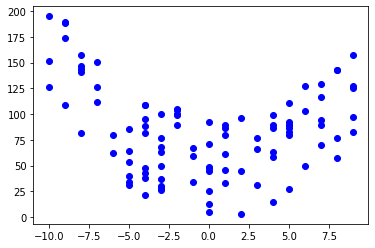

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.random.randint(-10, 10, 100)
y1 = x1 ** 2 - x1 + np.random.randint(1, 100, 100)
plt.scatter(x1, y1, c='b')

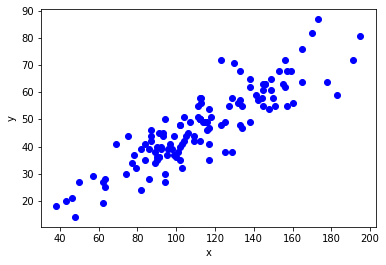

In [6]:
import pandas as pd
df = pd.read_csv('..//z_data//3_film.csv')
x = df['filmsize']
y = df['filmnum']
plt.scatter(x, y, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()